## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [4]:
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,FCF,PricePerShare,ROE,Prediction
1985-03,-1.232322,-1.079314,-0.669004,13.035309
1985-06,-1.232322,-1.084088,-0.669004,13.160484
1985-09,-1.232322,-1.081432,-0.669004,16.657703
1985-12,-1.232322,-1.007231,-0.669004,16.345213
1986-03,-1.232322,-1.013861,-0.669004,15.921562
1986-06,-1.232322,-1.022850,-0.669004,14.741072
1986-09,-1.232322,-1.047896,-0.669004,13.267827
1986-12,-1.232322,-1.079154,-0.669004,16.734827
1987-03,-1.232322,-1.005595,-0.669004,18.234604
1987-06,-1.232322,-0.973774,-0.669004,17.033018


In [5]:
data.shape

(143, 4)

## 2.1 No scaled y dataset evaluation

In [41]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
mlp = GridSearchCV(MLPRegressor(random_state=2021, max_iter=100000, hidden_layer_sizes=(3,3,3), activation='identity', solver='lbfgs', alpha=0.000041, learning_rate='constant', learning_rate_init=0.0000000000000000000000000000000000001, batch_size=1), n_jobs=-1, cv=cv,
                   param_grid={"batch_size": [1,2,3,4,5,6,7,8,9,10]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,mlp,scaling=False))

{'batch_size': 1}


In [23]:
from lib.fundamental_lib import all_grid_search
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
param_grid = {
    'random_state': [2021],
    'max_iter': [100000],
    'hidden_layer_sizes': [(3,3,3)], #[(3,), (3,3), (3,3,3), (2,), (2,2), (2,2,2)], #[(2,), (2,2), (2,2,2), (2,2,2,2), (2,1), (2,3), (2,4), (2,5)]
    'activation': ['relu'], #['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs'], #['lbfgs', 'sgd', 'adam']
    'alpha': [0.0000431], #[0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]
    'learning_rate': ['constant'], #['constant', 'invscaling', 'adaptive']
    'learning_rate_init': [0.0245], #[0.0245, 0.0246, 0.0247, 0.0248, 0.0249, 0.025, 0.0251, 0.0252, 0.0253, 0.0254, 0.0255, 0.0256, 0.0257, 0.0258, 0.0259] #[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
    'batch_size': ['auto']#list(range(21,201)) #60

}
mlp = GridSearchCV(MLPRegressor(), n_jobs=-1, cv=cv, param_grid=param_grid, scoring='neg_root_mean_squared_error')
all_grid_search(mlp, '{}_Manual_dataset.csv', PATH, stocks, 'mlp', scaling=False)

{'activation': 'identity', 'alpha': 4.31e-05, 'batch_size': 'auto', 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.0245, 'max_iter': 100000, 'random_state': 2021, 'solver': 'lbfgs'} GridSearch fit on NSC 
RMSE mean: 5.1049402153816645 
 MAPE mean: 0.11019202191970594 
 MAE mean: 3.1905887660997694 




/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'activation': 'logistic', 'alpha': 4.31e-05, 'batch_size': 'auto', 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.0245, 'max_iter': 100000, 'random_state': 2021, 'solver': 'lbfgs'} GridSearch fit on GL 
RMSE mean: 15.614131476889735 
 MAPE mean: 1.279546324817517 
 MAE mean: 12.488614790722387 


{'activation': 'identity', 'alpha': 4.31e-05, 'batch_size': 'auto', 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.0245, 'max_iter': 100000, 'random_state': 2021, 'solver': 'lbfgs'} GridSearch fit on PEP 
RMSE mean: 5.1049402153816645 
 MAPE mean: 0.11019202191970594 
 MAE mean: 3.1905887660997694 


{'activation': 'identity', 'alpha': 4.31e-05, 'batch_size': 'auto', 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.0245, 'max_iter': 100000, 'random_state': 2021, 'solver': 'lbfgs'} GridSearch fit on BDX 
RMSE mean: 5.1049402153816645 
 MAPE mean: 0.11019202191970594 
 MAE mean: 3.

In [ ]:
#hidden_layer_sizes=(3,), activation='relu', solver='lbfgs', alpha=0.0000435, learning_rate='invscaling', learning_rate_init=0.0246, batch_size=19
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 40, 'oob_score': False}
mlp = MLPRegressor(max_iter=50000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_Manual_dataset.csv', PATH, mlp, cv=cv, scaling=False)

## 3.0 Model testing settings

In [3]:
from lib.fundamental_lib import make_dict
datas = make_dict('{}_Manual_dataset.csv', PATH)

## 3.1 MLP Testing

In [24]:
param_grid = {
    'random_state': [2021],
    'max_iter': [100000],
    'hidden_layer_sizes': [(3,3,3)], #[(3,), (3,3), (3,3,3), (2,), (2,2), (2,2,2)], #[(2,), (2,2), (2,2,2), (2,2,2,2), (2,1), (2,3), (2,4), (2,5)]
    'activation': ['relu'], #['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs'], #['lbfgs', 'sgd', 'adam']
    'alpha': [0.0000431], #[0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]
    'learning_rate': ['constant'], #['constant', 'invscaling', 'adaptive']
    'learning_rate_init': [0.0245], #[0.0245, 0.0246, 0.0247, 0.0248, 0.0249, 0.025, 0.0251, 0.0252, 0.0253, 0.0254, 0.0255, 0.0256, 0.0257, 0.0258, 0.0259] #[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
    'batch_size': ['auto']#list(range(21,201)) #60

}
for key in param_grid.keys():
    param_grid[key] = param_grid[key][0]
print(param_grid)

{'random_state': 2021, 'max_iter': 100000, 'hidden_layer_sizes': (3, 3, 3), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 4.31e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.0245, 'batch_size': 'auto'}


In [6]:
from lib.fundamental_lib import model_results_revised_pred
#Params={'activation': 'identity', 'hidden_layer_sizes': (3,), 'solver': 'adam'}
#mlp = MLPRegressor(random_state=2021, max_iter=100000, hidden_layer_sizes=(3,3,3), activation='identity', solver='lbfgs', alpha=0.000041, learning_rate='constant', learning_rate_init=0.0000000000000000000000000000000000001, batch_size=1)
#mlp = MLPRegressor(random_state=2021, max_iter=100000, hidden_layer_sizes=(3,), activation='relu', solver='lbfgs', alpha=0.0000435, learning_rate='invscaling', learning_rate_init=0.0246, batch_size=19)
#mlp = MLPRegressor(random_state=2021, max_iter=100000, hidden_layer_sizes=(3,3,3), activation='relu', solver='lbfgs', alpha=0.0000431, learning_rate='constant', learning_rate_init=0.0245, batch_size=1) #best
Params={'random_state': 2021, 'max_iter': 100000, 'hidden_layer_sizes': (3, 3, 3), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 4.31e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.0245, 'batch_size': 'auto'}
mlp = MLPRegressor(**Params)
model_dict = {}
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    model_dict[stock] = model_results_revised_pred(datas[stock], mlp, label=stock, scaling=False, graphs=False, metrics=False)

## 3.2 First selected MLP model (Not used here)

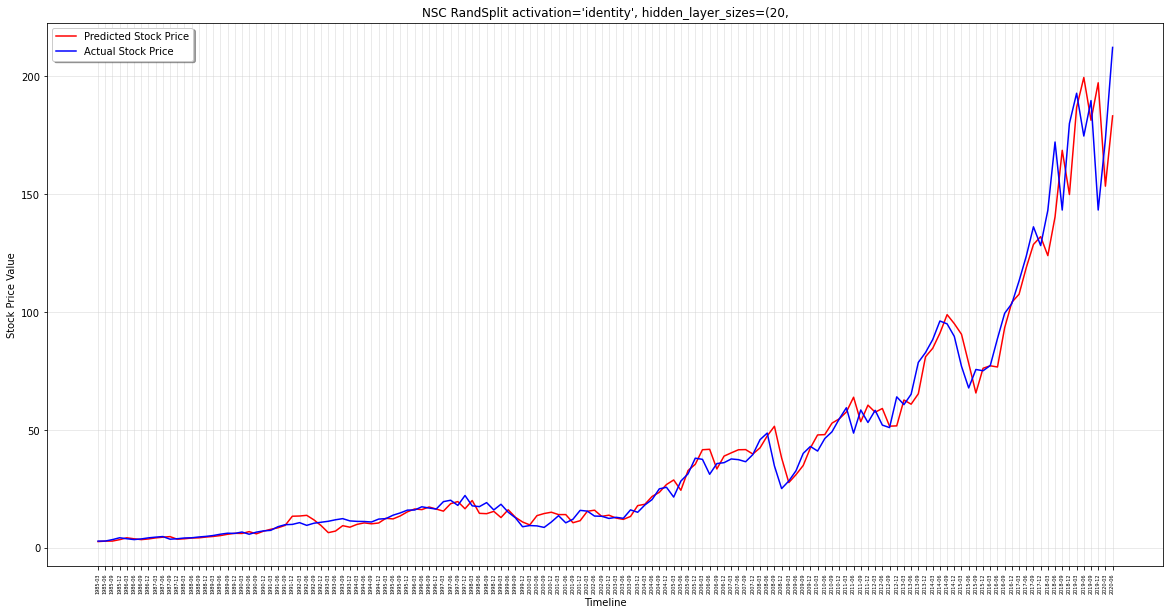

NSC MODEL RESULTS
 RMSE
 	Test: 5.823741778964781
 MAPE
 	Test: 0.12496528599225087
 MAE
 	Test: 3.5894398107889596
 R2 Score Adj
 	Test: 0.9811867269779834



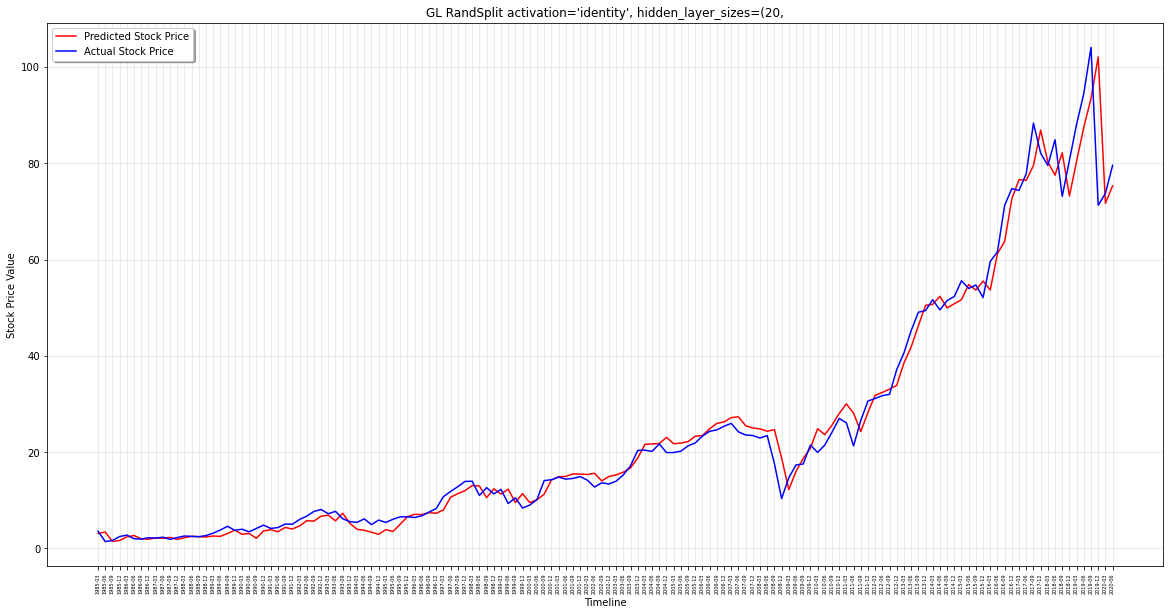

GL MODEL RESULTS
 RMSE
 	Test: 2.2911937910184204
 MAPE
 	Test: 0.11164361435270395
 MAE
 	Test: 1.5660635955078073
 R2 Score Adj
 	Test: 0.9901192649239796



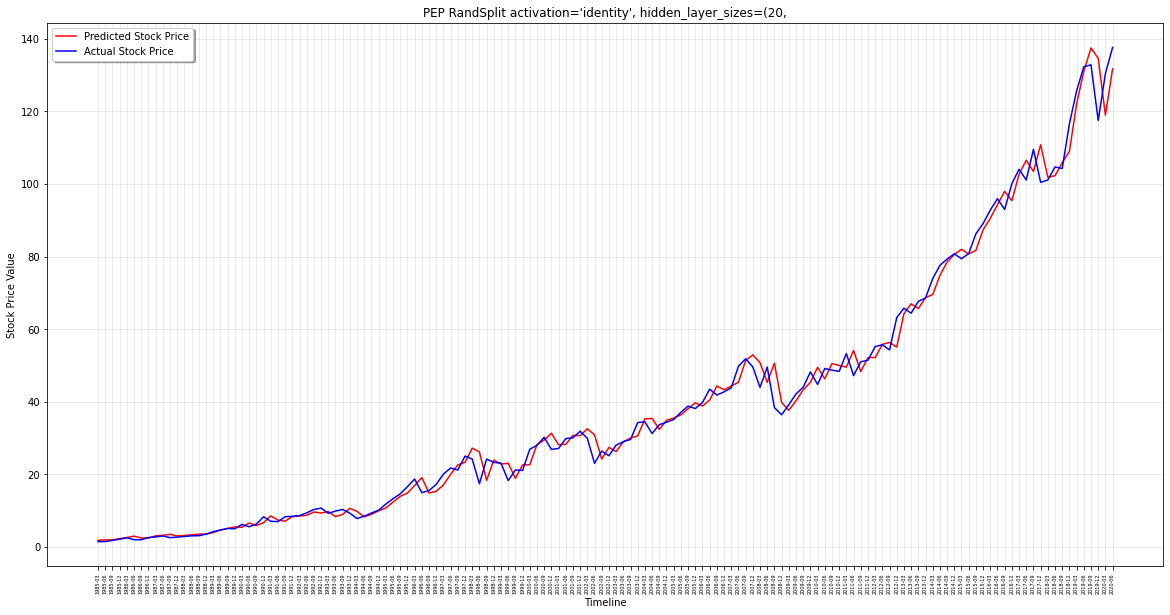

PEP MODEL RESULTS
 RMSE
 	Test: 2.4267207471643752
 MAPE
 	Test: 0.08253480493513123
 MAE
 	Test: 1.6130882441360386
 R2 Score Adj
 	Test: 0.9942032738152191



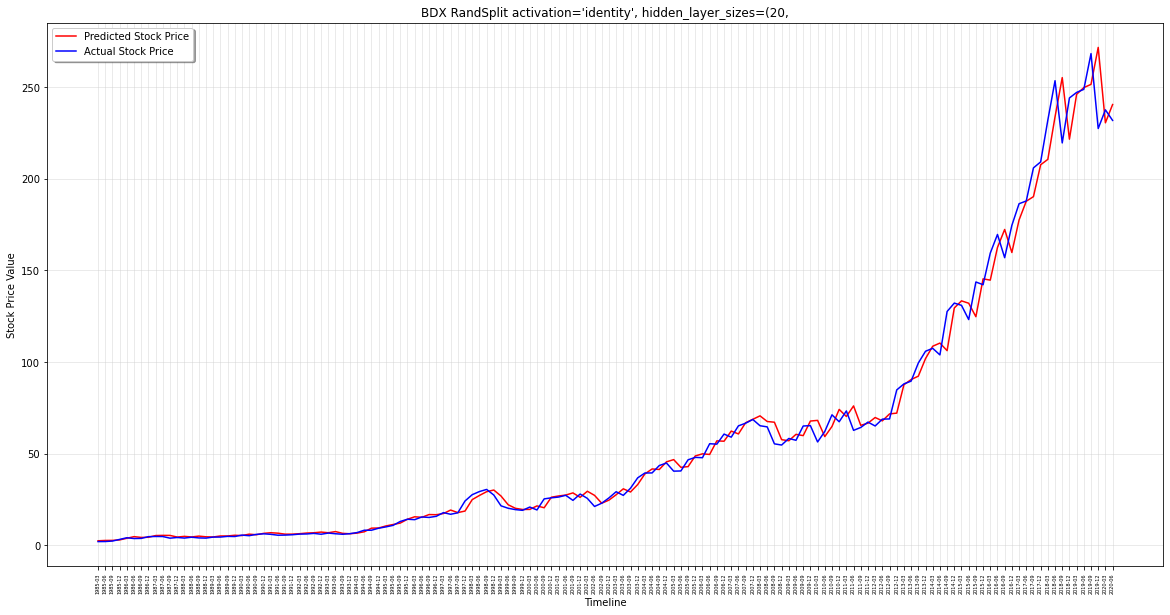

BDX MODEL RESULTS
 RMSE
 	Test: 6.180053324085424
 MAPE
 	Test: 0.0836284944020131
 MAE
 	Test: 3.1466934565054046
 R2 Score Adj
 	Test: 0.990103835892518



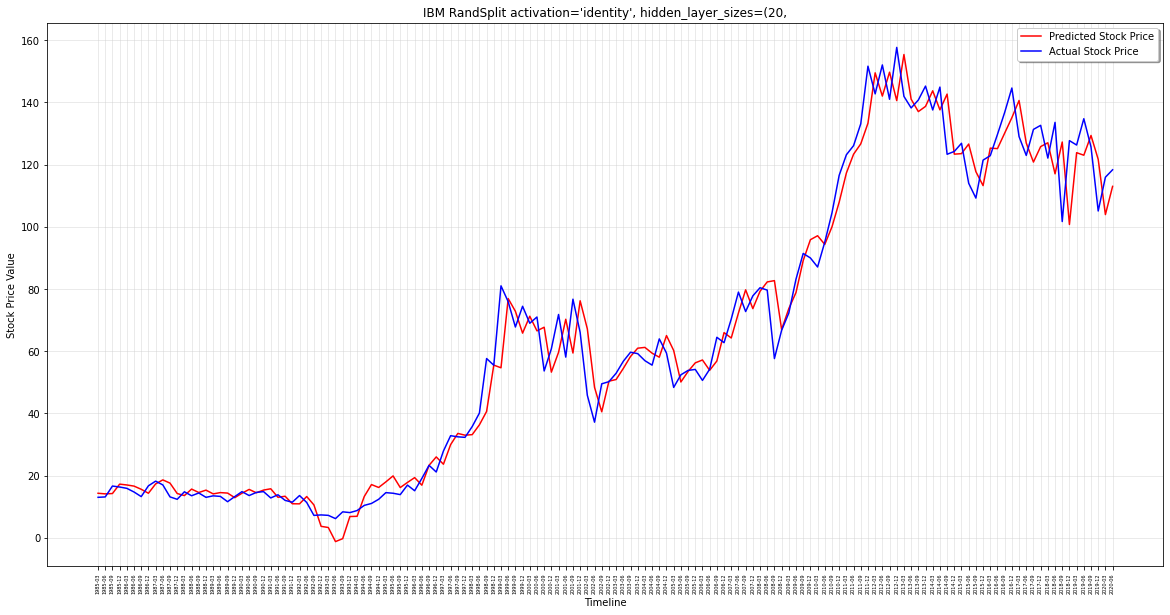

IBM MODEL RESULTS
 RMSE
 	Test: 8.926311055269029
 MAPE
 	Test: 0.1523410864710671
 MAE
 	Test: 6.10716992802055
 R2 Score Adj
 	Test: 0.9698787014458563



In [31]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
#Params={'activation': 'logistic', 'hidden_layer_sizes': (20,), 'solver': 'sgd'}
#Params={'activation': 'identity', 'hidden_layer_sizes': (30,), 'solver': 'sgd'} #con error_score=1
#Params={'activation': 'identity', 'hidden_layer_sizes': (20, 20), 'solver': 'sgd'}
#Params={'activation': 'identity', 'hidden_layer_sizes': (20,), 'solver': 'adam'}
Params={'activation': 'identity', 'hidden_layer_sizes': (20,), 'solver': 'adam'}
mlp = MLPRegressor(random_state=2021, max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    model_results_revised(datas[stock], mlp, label=stock, scaling=False)

In [7]:
model_dict

{'NSC': (Index(['1985-03', '1985-06', '1985-09', '1985-12', '1986-03', '1986-06',
         '1986-09', '1986-12', '1987-03', '1987-06',
         ...
         '2018-06', '2018-09', '2018-12', '2019-03', '2019-06', '2019-09',
         '2019-12', '2020-03', '2020-06', '2020-09'],
        dtype='object', length=143),
  array([  3.43393738,   3.63015628,   3.64934915,   4.24463831,
           5.013549  ,   4.60741178,   4.25814817,   4.5332726 ,
           4.97422451,   5.2665387 ,   5.51029295,   4.42488905,
           4.60483788,   4.91349796,   4.99808279,   5.33453294,
           5.58138257,   5.9419422 ,   6.47811019,   6.89396014,
           6.8210172 ,   7.39836475,   6.48718364,   7.37787124,
           7.91096894,   8.21956363,   9.61369687,  10.36812669,
          10.56133484,  11.18860067,   9.8442642 ,  10.81796275,
          10.76803935,  11.24485424,  12.21754574,  12.42417349,
          11.64051386,  11.68079637,  11.66793023,  11.65479828,
          13.11074798,  13.16281674,

In [8]:
nsc_mlp = (model_dict['NSC'][1],np.reshape(model_dict['NSC'][2], (143)))
nsc_svr = ([  2.64039825,   2.85123769,   2.87186064,   3.51150561,
           4.33770888,   3.90130983,   3.5260221 ,   3.82164643,
           4.29545427,   4.60954918,   4.8714659 ,   3.70518708,
           3.89854414,   4.2302029 ,   4.32109025,   4.68260976,
           4.9478525 ,   5.33527791,   5.91139651,   6.358232  ,
           6.27985398,   6.94802554,   5.96895108,   6.9804531 ,
           7.61968007,   8.03210036,   9.42769358,  11.06279605,
          11.24239917,  11.82136861,  10.2305815 ,  10.3850103 ,
           9.58503026,  10.14623784,  11.52603628,  11.52804332,
          11.18948656,  11.38543677,  11.27959832,  11.36028485,
          13.0611277 ,  13.03539373,  14.49459346,  15.88463889,
          17.14424062,  17.05650684,  18.39848928,  17.68020413,
          16.94179405,  20.22003576,  20.93883338,  18.23160983,
          22.42247989,  17.26245162,  16.9686193 ,  18.3030168 ,
          15.09569839,  17.90271468,  14.26930379,  11.77917729,
           8.82538196,  11.08483379,  11.54461191,  11.42056324,
          12.37580966,  13.87999506,  10.45760808,  11.86721917,
          15.9579276 ,  16.00483625,  13.60313025,  13.80421632,
          12.82603022,  12.83243863,  13.20411711,  17.36818752,
          17.01258985,  20.44172717,  22.72437383,  27.09842932,
          28.44100561,  24.14425542,  32.04389625,  35.11135758,
          41.90145274,  41.63945303,  34.0925519 ,  39.30803725,
          40.16097059,  41.66011871,  41.49372161,  40.12456645,
          43.11135156,  49.17295383,  52.83508793,  38.51182956,
          27.89576426,  31.1691868 ,  35.32928201,  42.98283544,
          47.41247799,  46.47024756,  51.93228164,  54.4913989 ,
          59.01490126,  64.87872155,  53.84292821,  62.86993735,
          58.49585858,  62.16724147,  54.84689389,  54.2932477 ,
          67.02522114,  64.25890526,  68.94879982,  84.23881521,
          88.26088837,  94.51899834, 102.82597823, 100.26636001,
          94.99118292,  81.73610679,  70.31697284,  79.74014332,
          79.99686027,  80.98339931,  95.57477381, 106.91741092,
         110.9261908 , 121.88156444, 132.62323581, 143.03140239,
         134.66984163, 151.2138047 , 181.53702761, 154.32958551,
         192.95363626, 206.37953304, 187.26876505, 203.53792659,
         155.8318271 , 187.13386783, 228.66796038],
          [  2.92391539,   2.94358873,   3.55378056,   4.3419404 ,
          3.92563581,   3.56762862,   3.84964061,   4.30163145,
          4.60126352,   4.85112   ,   3.73854375,   3.92299747,
          4.23938465,   4.326087  ,   4.67095995,   4.9239893 ,
          5.29357529,   5.84316587,   6.26942635,   6.19465733,
          6.76684666,   5.83285475,   6.72350311,   7.25243139,
          7.47981644,   9.02917862,   9.88060856,  10.00152111,
         10.74805641,   9.59652519,  10.50385857,  10.92472935,
         11.33166122,  11.9642725 ,  12.44889736,  11.48754215,
         11.28347683,  11.2347517 ,  11.02350903,  12.26035881,
         12.44808865,  13.91011143,  14.87086773,  16.06272316,
         16.09929085,  17.47732162,  16.9367485 ,  16.51804543,
         19.65143394,  20.24795723,  18.05590439,  22.26053429,
         17.86541557,  17.54071045,  19.24390602,  16.13770676,
         18.53791618,  15.17916393,  12.80628109,   9.00950241,
          9.51417446,   9.37397861,   8.72989082,  11.01964283,
         13.70166683,  10.67622089,  12.18379498,  15.95627117,
         15.62678242,  13.54010105,  13.45156956,  12.53500175,
         13.01021957,  12.59087086,  16.15865135,  15.14816189,
         18.24680901,  20.53913879,  25.06741524,  25.74381256,
         21.5868187 ,  28.37890434,  31.46752548,  38.07559586,
         37.58539963,  31.24291039,  35.79124451,  36.1792984 ,
         37.74557495,  37.45274353,  36.57792664,  39.60952759,
         45.92023468,  48.72861862,  34.81032944,  25.1962471 ,
         28.40046883,  32.7524147 ,  40.10301971,  43.05643082,
         41.10284424,  46.39887238,  49.26393509,  54.67411804,
         59.4601059 ,  48.70901489,  58.50630569,  53.20760727,
         58.37739563,  52.10459137,  51.04542542,  64.07817078,
         60.78800201,  65.18141937,  78.69120789,  82.85762787,
         88.35829926,  96.23809814,  95.01986694,  89.71379852,
         77.03516388,  67.85177612,  75.67884064,  75.14569855,
         77.35467529,  88.78811646,  99.50068665, 103.6295929 ,
        113.21894836, 123.69528961, 136.16723633, 128.2086792 ,
        143.18119812, 172.1144104 , 143.27571106, 179.9838562 ,
        192.79234314, 174.65020752, 189.68055725, 143.28366089,
        173.27191162, 212.2223053 , 235.03128052])
nsc_rf = ([  3.79580059,   3.79580059,   3.79580059,   3.79580059,
           4.51385644,   3.97192685,   3.79580059,   3.93146507,
           4.51385644,   4.53631451,   4.75751349,   3.83828022,
           3.97192685,   4.41214473,   4.51385644,   4.57848961,
           5.22331481,   5.72443853,   5.9403968 ,   5.95385168,
           5.95385168,   6.17707896,   5.9403968 ,   6.21105101,
           8.66592279,   8.9084546 ,   9.69362629,   9.72343311,
           9.72343311,  10.4075001 ,   9.64209569,  10.98013385,
          11.51010846,  11.54125365,  13.56522647,  13.57864323,
          11.39322035,  11.29252629,  11.33771042,  11.56297578,
          14.04492036,  14.08139004,  14.8217761 ,  16.60426314,
          17.11069206,  16.8882949 ,  18.80074635,  17.72047707,
          17.634318  ,  19.68920221,  20.60562703,  19.46949854,
          21.02640084,  17.84069391,  18.20642439,  17.56782179,
          14.79578408,  17.45010801,  14.61673634,  11.9957889 ,
           9.61907348,   9.61428882,   9.37569072,  10.6511724 ,
          10.94183619,  13.0265521 ,  10.70937548,  13.25265853,
          14.92995193,  14.98405381,  13.12962906,  13.04784555,
          13.40964813,  13.05188667,  14.064715  ,  16.2870774 ,
          16.45248968,  20.04965887,  23.95021199,  25.75271395,
          28.28079021,  26.37860444,  31.46894137,  35.41636531,
          37.40883622,  35.03827554,  35.73067842,  36.66262117,
          34.97987403,  37.35322257,  35.79470504,  38.39808676,
          43.547727  ,  46.9336603 ,  46.72894441,  33.75958859,
          27.28741903,  33.65620448,  36.8915632 ,  42.22522638,
          46.26293007,  44.01275521,  48.21382909,  52.31928476,
          54.45723649,  53.92008581,  49.05944154,  54.99506507,
          54.43686164,  54.72357218,  54.12250373,  53.63523046,
          66.81196095,  55.4682792 ,  68.73898987,  88.23351831,
          87.97927718,  92.43649206,  94.39672567,  88.71506343,
          87.0163316 ,  74.48120468,  71.60695676,  73.03679005,
          74.03225261,  81.58190596,  92.33689118, 102.48878575,
         111.32346462, 130.97224598, 140.93249036, 146.28408465,
         141.49398487, 162.47201928, 167.70606628, 164.89559354,
         180.10924909, 180.10924909, 186.62828615, 176.56204988,
         179.89529457, 190.15864322, 190.76777346],
         [  2.92391539,   2.94358873,   3.55378056,   4.3419404 ,
         3.92563581,   3.56762862,   3.84964061,   4.30163145,
         4.60126352,   4.85112   ,   3.73854375,   3.92299747,
         4.23938465,   4.326087  ,   4.67095995,   4.9239893 ,
         5.29357529,   5.84316587,   6.26942635,   6.19465733,
         6.76684666,   5.83285475,   6.72350311,   7.25243139,
         7.47981644,   9.02917862,   9.88060856,  10.00152111,
        10.74805641,   9.59652519,  10.50385857,  10.92472935,
        11.33166122,  11.9642725 ,  12.44889736,  11.48754215,
        11.28347683,  11.2347517 ,  11.02350903,  12.26035881,
        12.44808865,  13.91011143,  14.87086773,  16.06272316,
        16.09929085,  17.47732162,  16.9367485 ,  16.51804543,
        19.65143394,  20.24795723,  18.05590439,  22.26053429,
        17.86541557,  17.54071045,  19.24390602,  16.13770676,
        18.53791618,  15.17916393,  12.80628109,   9.00950241,
         9.51417446,   9.37397861,   8.72989082,  11.01964283,
        13.70166683,  10.67622089,  12.18379498,  15.95627117,
        15.62678242,  13.54010105,  13.45156956,  12.53500175,
        13.01021957,  12.59087086,  16.15865135,  15.14816189,
        18.24680901,  20.53913879,  25.06741524,  25.74381256,
        21.5868187 ,  28.37890434,  31.46752548,  38.07559586,
        37.58539963,  31.24291039,  35.79124451,  36.1792984 ,
        37.74557495,  37.45274353,  36.57792664,  39.60952759,
        45.92023468,  48.72861862,  34.81032944,  25.1962471 ,
        28.40046883,  32.7524147 ,  40.10301971,  43.05643082,
        41.10284424,  46.39887238,  49.26393509,  54.67411804,
        59.4601059 ,  48.70901489,  58.50630569,  53.20760727,
        58.37739563,  52.10459137,  51.04542542,  64.07817078,
        60.78800201,  65.18141937,  78.69120789,  82.85762787,
        88.35829926,  96.23809814,  95.01986694,  89.71379852,
        77.03516388,  67.85177612,  75.67884064,  75.14569855,
        77.35467529,  88.78811646,  99.50068665, 103.6295929 ,
       113.21894836, 123.69528961, 136.16723633, 128.2086792 ,
       143.18119812, 172.1144104 , 143.27571106, 179.9838562 ,
       192.79234314, 174.65020752, 189.68055725, 143.28366089,
       173.27191162, 212.2223053 , 235.03128052])

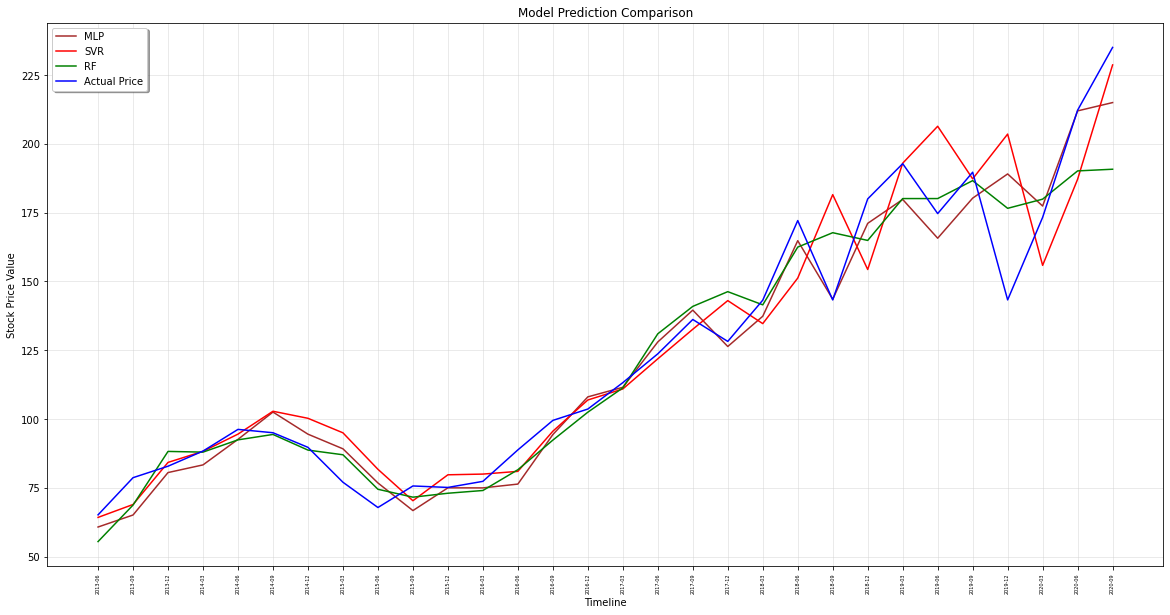

In [15]:
# Plot parameters
	fig1,ax1 = plt.subplots(figsize=(20,10))

	plt.plot(model_dict['NSC'][0][-30:], nsc_mlp[0][-30:], color='brown', label='MLP')
	plt.plot(model_dict['NSC'][0][-30:], nsc_svr[0][-30:], color='red', label='SVR')
	plt.plot(model_dict['NSC'][0][-30:], nsc_rf[0][-30:], color='green', label='RF')
	plt.plot(model_dict['NSC'][0][-30:], nsc_mlp[1][-30:], color='blue', label='Actual Price')

	#plt.axvline(x = train.index[-1], color='green', linewidth=2, linestyle='--')

	plt.grid(which='major', color='#cccccc', alpha=0.5)

	plt.legend(shadow=True)
	plt.title('Model Prediction Comparison', family='DejaVu Sans', fontsize=12)
	plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
	plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
	plt.xticks(rotation=90, fontsize=5)
	plt.show()